In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image as im
import random

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')



### Uplodaing the data

In [2]:
train_dir = r'C:\Users\meirk\Desktop\train\train/'

train_images_filepath = [train_dir + last_file_name for last_file_name in os.listdir(train_dir)]
print("Done")
train_dogs_filepaths = [train_dir + dog_file_name for dog_file_name in os.listdir(train_dir) if 'dog' in dog_file_name]
train_cats_filepaths = [train_dir + cat_file_name for cat_file_name in os.listdir(train_dir) if 'cat' in cat_file_name]
print("Done")

Done
Done


(374, 500, 3)
(374, 500, 3)


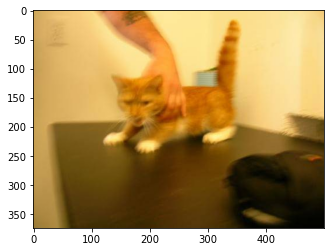

In [3]:
img = cv2.imread(train_images_filepath[0])
print(img.shape)
#img = cv2.resize(img, (64,64))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
print(img.shape)
plt.imshow(img)

In [4]:
def read_image(file_path):
    #grayscaling whan uploasding using cv2
    img = cv2.imread(file_path,cv2.IMREAD_COLOR)
    #resizing the image to 64,64 format
    return cv2.resize(img, (64, 64))

#### Note: read_image return the image after resizing it to 64X64 in ordr to make sure that all images are int he same foramt.

In [5]:
def prep_data(images):
    m = len(images)
    n_x = 12288
    X = np.ndarray((m, n_x), dtype=np.uint8)
    y = np.zeros((m, 1))

    for i, image_file in enumerate(images):
        image = read_image(image_file)
       # image = plt.imread(image_file, 0)
        X[i, :] = np.squeeze(image.reshape((n_x, 1)))
        #X[i,:] = np.array(image)
        #chainging cats to 0's and dogs to 1's
        if '/dog' in image_file:
            y[i, 0] = 1
        elif '/cat' in image_file:
             y[i, 0] = 0
        
    return X, y

In [6]:
data,target = prep_data(train_images_filepath)
#X_dogs, y_dogs = prep_data(train_dogs_filepaths)
#x_cats, y_cats = prep_data(train_cats_filepaths)

In [7]:
data_df = pd.DataFrame(data)
data_df

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,90,167,206,96,173,212,101,179,222,106,...,2,0,2,2,0,2,2,0,2,2
1,43,44,40,49,42,39,38,37,33,31,...,66,63,67,85,59,63,81,19,26,38
2,54,45,40,59,45,41,58,47,42,68,...,155,4,167,174,4,192,193,9,175,180
3,217,222,220,218,223,222,230,231,231,230,...,205,220,221,217,211,214,214,208,212,216
4,73,110,138,81,118,146,43,81,110,47,...,111,77,105,117,65,94,104,62,86,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,107,144,148,108,145,149,111,148,152,113,...,178,134,169,179,134,169,179,135,170,180
24996,56,84,114,54,81,107,55,80,104,64,...,98,55,84,105,80,111,132,40,65,87
24997,34,37,43,44,47,53,45,46,48,36,...,122,164,206,243,96,133,157,118,162,205
24998,254,254,254,243,242,254,212,218,254,168,...,105,116,113,136,114,111,127,113,113,129


## Data visualization

In [8]:
data_df.isna().sum()

0        0
1        0
2        0
3        0
4        0
        ..
12283    0
12284    0
12285    0
12286    0
12287    0
Length: 12288, dtype: int64

<module 'seaborn' from 'C:\\Users\\meirk\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

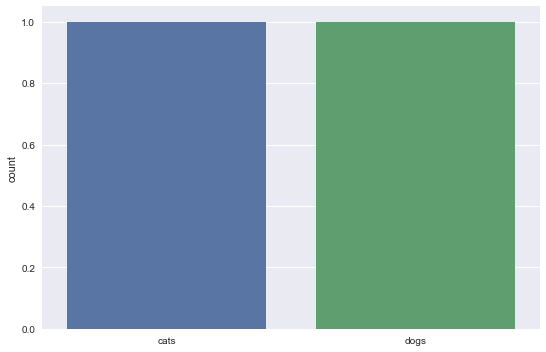

In [9]:
plt.style.use('seaborn')
labels = pd.DataFrame(data=target, columns=['label'])
counts = labels.value_counts()
sns.catplot(data=counts,kind='count',height=5,aspect=1.5,x=['cats','dogs'])
sns

Lets look on some random images to make sure the data did uploaded in gratscale

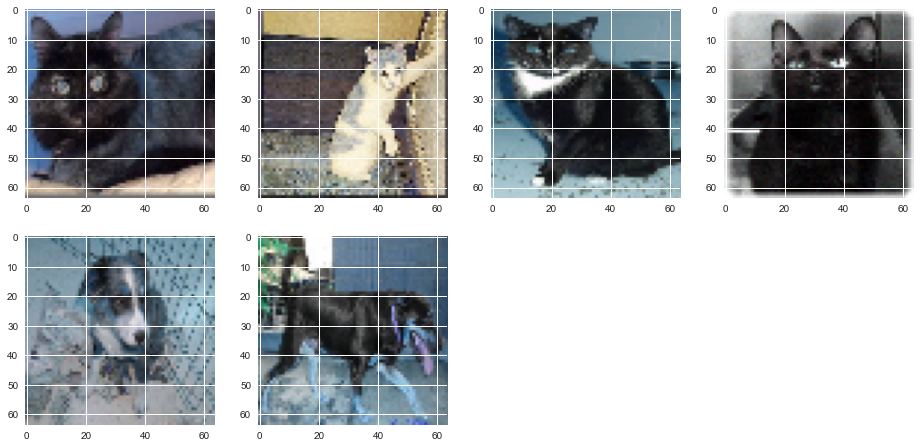

In [10]:
plt.figure(figsize=(16,16))

for i in range(0,6):
    index = random.randint(0,24999)
   # plt.imshow(data[index].reshape(64,64),interpolation='nearest')
    fig = plt.subplot(4,4,i+1)
   # fig.axis('off')
    #fig.imshow(data[index].reshape(64,64)) 
    fig.imshow(data[index].reshape(64,64,3))

In [11]:
data_df = data_df.drop([4656,4965,6599,7411,8297,9587,10786, 10801,1742,2528,20118,21017,23597,23776,24099,24465,12715,12767,12950,13388,13821],axis=0)
data_df

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,90,167,206,96,173,212,101,179,222,106,...,2,0,2,2,0,2,2,0,2,2
1,43,44,40,49,42,39,38,37,33,31,...,66,63,67,85,59,63,81,19,26,38
2,54,45,40,59,45,41,58,47,42,68,...,155,4,167,174,4,192,193,9,175,180
3,217,222,220,218,223,222,230,231,231,230,...,205,220,221,217,211,214,214,208,212,216
4,73,110,138,81,118,146,43,81,110,47,...,111,77,105,117,65,94,104,62,86,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,107,144,148,108,145,149,111,148,152,113,...,178,134,169,179,134,169,179,135,170,180
24996,56,84,114,54,81,107,55,80,104,64,...,98,55,84,105,80,111,132,40,65,87
24997,34,37,43,44,47,53,45,46,48,36,...,122,164,206,243,96,133,157,118,162,205
24998,254,254,254,243,242,254,212,218,254,168,...,105,116,113,136,114,111,127,113,113,129


In [12]:
#bad cats = [4656,4965,6599,7411,8297,9587,10786, 10801,1742,2528]
#bad dogs = [20118,21017,23597,23776,24099,24465,-12317,12715,12767,12950,13388,13821]

## PCA

In [13]:
data_pca_s = data/255
#pd.DataFrame(data=data_pca_s)

In [14]:
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_pca_s)

In [15]:
pd.DataFrame(data=data_pca)

,0,1,2,3,4,5,6,7,8,9,...,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210
0,5.328198,-15.640643,-21.331782,-0.892219,3.231810,4.817889,2.457452,0.385681,-13.242676,5.299916,...,-0.011681,-0.019608,-0.189221,0.023557,0.016456,0.009871,-0.178797,0.010183,-0.113333,-0.021235
1,-19.759589,-4.771914,-4.678595,2.492816,-5.114088,0.715386,-1.965151,-3.627247,0.850615,-1.398264,...,-0.054271,0.095089,0.034663,-0.016294,0.040170,-0.152474,0.149345,-0.133522,-0.256749,0.105945
2,-5.255384,3.296687,-4.898563,5.847473,4.611971,8.501558,1.452670,-7.340222,3.497005,5.348925,...,-0.018851,-0.008433,-0.006068,0.093513,-0.167501,0.001387,-0.000554,0.145069,0.164380,-0.118865
3,24.438753,-2.015292,3.491844,0.731895,7.574497,-7.795504,-7.165071,-0.183380,-1.438826,6.221594,...,-0.073451,-0.159036,-0.108472,-0.106968,-0.062811,-0.036522,0.209184,0.133897,0.006876,0.049932
4,-12.276918,10.206479,-8.393849,-4.190869,-10.524523,-4.322662,-5.017132,-0.306168,3.135734,7.252651,...,-0.032086,-0.128109,0.154548,-0.034404,0.156927,0.148478,0.242731,-0.054934,0.308064,-0.181120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-0.574409,-13.119423,-1.628984,22.426535,-1.650579,-6.707955,-4.070051,2.977261,-4.663001,-1.448080,...,0.086051,0.004655,0.024359,-0.041689,-0.048927,-0.040346,0.046394,-0.046938,-0.075226,-0.133761
24996,-18.611357,-8.433805,1.728820,-4.824814,-0.606890,1.157710,-0.917869,-0.514845,-0.596213,1.610924,...,-0.013730,-0.144212,0.213333,-0.096222,-0.075553,-0.080120,-0.045832,-0.122003,-0.165534,-0.216384
24997,-6.465783,-6.302721,4.069299,-1.329906,-1.946082,-3.327296,5.009578,-3.126560,-5.235415,0.554273,...,-0.360337,-0.362643,0.368297,-0.333267,-0.410965,-0.160724,-0.117055,0.228825,-0.034295,-0.138963
24998,3.059507,-0.230976,-6.162224,6.171229,5.698861,1.212373,2.355069,-1.428014,-0.042567,-0.007749,...,0.004077,0.218681,0.057748,-0.074917,0.160820,-0.081761,-0.117491,-0.036637,0.033590,-0.301737


In [16]:
#scaling
scaler = StandardScaler()
data_pca_scaled = scaler.fit_transform(data_pca)

In [17]:
pd.DataFrame(data=data_pca_scaled)

,0,1,2,3,4,5,6,7,8,9,...,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210
0,0.429892,-1.694761,-2.793062,-0.130542,0.657494,1.036209,0.575960,0.098015,-3.499410,1.413046,...,-0.069171,-0.116143,-1.121873,0.139716,0.097630,0.058586,-1.061600,0.060463,-0.673264,-0.126152
1,-1.594251,-0.517066,-0.612589,0.364729,-1.040434,0.153862,-0.460578,-0.921812,0.224777,-0.372800,...,-0.321369,0.563229,0.205514,-0.096638,0.238318,-0.904943,0.886732,-0.792806,-1.525233,0.629397
2,-0.424017,0.357216,-0.641390,0.855556,0.938281,1.828476,0.340466,-1.865410,0.924092,1.426112,...,-0.111625,-0.049947,-0.035975,0.554614,-0.993751,0.008233,-0.003291,0.861368,0.976509,-0.706151
3,1.971777,-0.218369,0.457202,0.107085,1.540990,-1.676621,-1.679297,-0.046603,-0.380214,1.658780,...,-0.434940,-0.941999,-0.643118,-0.634412,-0.372644,-0.216761,1.242020,0.795032,0.040846,0.296634
4,-0.990531,1.105935,-1.099043,-0.613174,-2.141157,-0.929698,-1.175879,-0.077808,0.828626,1.933677,...,-0.189999,-0.758814,0.916299,-0.204046,0.931013,0.881222,1.441203,-0.326177,1.830073,-1.075996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-0.046345,-1.421571,-0.213290,3.281271,-0.335801,-1.442716,-0.953909,0.756627,-1.232210,-0.386082,...,0.509552,0.027571,0.144422,-0.247250,-0.290276,-0.239456,0.275460,-0.278702,-0.446886,-0.794644
24996,-1.501609,-0.913855,0.226362,-0.705928,-0.123468,0.248995,-0.215123,-0.130840,-0.157551,0.429499,...,-0.081301,-0.854195,1.264829,-0.570681,-0.448238,-0.475517,-0.272123,-0.724408,-0.983368,-1.285490
24997,-0.521675,-0.682939,0.532811,-0.194581,-0.395920,-0.715619,1.174108,-0.794570,-1.383472,0.147778,...,-2.133750,-2.147996,2.183600,-1.976567,-2.438172,-0.953904,-0.695011,1.358677,-0.203730,-0.825550
24998,0.246848,-0.025028,-0.806846,0.902925,1.159402,0.260752,0.551964,-0.362909,-0.011248,-0.002066,...,0.024142,1.295283,0.342383,-0.444324,0.954114,-0.485258,-0.697597,-0.217537,0.199546,-1.792556


1211 dimentions instead of 4095.

## Modeling

### Train test split

In [18]:
x_train_pca_, x_test_pca_, y_train_pca_, y_test_pca_ = train_test_split(data_pca_scaled, target, test_size=0.3, random_state=42)

###### LogisticRegression

In [19]:
log_reg = LogisticRegression()
log_reg.fit(x_train_pca_,y_train_pca_.ravel())
log_pred = log_reg.predict(x_test_pca_)

In [20]:
log_score = metrics.accuracy_score(y_true=y_test_pca_,y_pred=log_pred)
log_recall = metrics.recall_score(y_true=y_test_pca_,y_pred=log_pred)
log_percision = metrics.precision_score(y_true=y_test_pca_,y_pred=log_pred)
log_f1 = metrics.f1_score(y_true=y_test_pca_,y_pred=log_pred)
log_scores = pd.DataFrame(index = ['log_reg'], data = {'score':log_score,'recall':log_recall,'percision':log_percision,'f1':log_f1})
log_scores

,score,recall,percision,f1
log_reg,0.601333,0.581644,0.605219,0.593197


<AxesSubplot:>

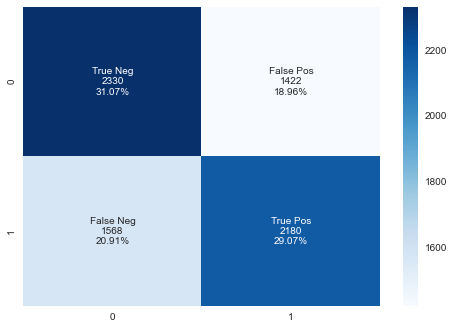

In [21]:
log_matrix= metrics.confusion_matrix(y_true=y_test_pca_,y_pred=log_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in log_matrix.flatten()]
group_percent = ["{0:.2%}".format(value) for value in log_matrix.flatten()/np.sum(log_matrix)]

labels = [[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percent)]]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(log_matrix,annot=labels, fmt='', cmap='Blues')

###### XGBoost
###### Finding best params with RandommizedSearchCV
for this notebook I decided to use RandomizedSearchCV, becuse GridSearchCV run was too long (sometimes even 12 hours).

In [22]:
params = {'n_estimators':range(1,50,2),'max_depth':range(1,50,2)}
#grid_xgb = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False,eval_metric='mlogloss'),param_grid=params,cv=5,return_train_score=False,)
#grid_xgb.fit(x_train_pca_,y_train_pca_.ravel())
rgrid_xgb = RandomizedSearchCV(estimator=XGBClassifier(use_label_encoder=False,eval_metric = 'mlogloss'), param_distributions=params, scoring= 'accuracy',
                              n_jobs=-1, cv = 5)
rgrid_xgb.fit(x_train_pca_,y_train_pca_)
print(rgrid_xgb.best_estimator_, rgrid_xgb.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=49, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None) 0.6282857142857143


In [23]:
xgb_clf_ = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=47, min_child_weight=1,
              monotone_constraints='()', n_estimators=49, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
xgb_clf_.fit(x_train_pca_, y_train_pca_.ravel())
xgb_pred_ = xgb_clf_.predict(x_test_pca_)

In [24]:
xgb_score = metrics.accuracy_score(y_true=y_test_pca_,y_pred=xgb_pred_)
xgb_recall = metrics.recall_score(y_true=y_test_pca_,y_pred=xgb_pred_)
xgb_percision = metrics.precision_score(y_true=y_test_pca_,y_pred=xgb_pred_)
xgb_f1 = metrics.f1_score(y_true=y_test_pca_,y_pred=xgb_pred_)
xgb_scores = pd.DataFrame(index = ['xgb'], data = {'score':xgb_score,'recall':xgb_recall,'percision':xgb_percision,'f1':xgb_f1})
xgb_scores

,score,recall,percision,f1
xgb,0.6108,0.623533,0.607802,0.615567


<AxesSubplot:>

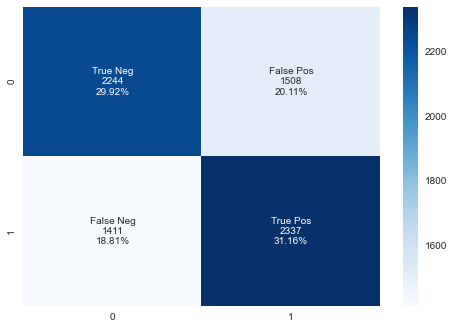

In [25]:
xgb_matrix= metrics.confusion_matrix(y_true=y_test_pca_,y_pred=xgb_pred_)
group_names_xgb = ['True Neg','False Pos','False Neg','True Pos']
group_counts_xgb = ["{0:0.0f}".format(value) for value in xgb_matrix.flatten()]
group_percent_xgb = ["{0:.2%}".format(value) for value in xgb_matrix.flatten()/np.sum(xgb_matrix)]

labels = [[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_xgb,group_counts_xgb,group_percent_xgb)]]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(xgb_matrix,annot=labels, fmt='', cmap='Blues')

###### Stacking

In [26]:
#find the hyper parameters to RandomForestClassifier
params_rnd = {'n_estimators':range(1,200,2),'min_samples_split':range(1,100,2)}
rnd_rgrid = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=params_rnd, n_jobs=-1, cv =5)
rnd_rgrid.fit(x_train_pca_,y_train_pca_.ravel())
print(rnd_rgrid.best_estimator_,"\n",rnd_rgrid.best_score_,"\n",rnd_rgrid.best_params_)

RandomForestClassifier(min_samples_split=53, n_estimators=189) 
 0.6092000000000001 
 {'n_estimators': 189, 'min_samples_split': 53}


In [36]:
estimators = [('rf', RandomForestClassifier(n_estimators=189,min_samples_split=53, random_state=42))
              ,('knn',KNeighborsClassifier())]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [37]:
stacking_clf.fit(x_train_pca_, y_train_pca_.ravel())
stack_pred = stacking_clf.predict(x_test_pca_)

In [38]:
stack_score = metrics.accuracy_score(y_true=y_test_pca_,y_pred=stack_pred)
stack_recall = metrics.recall_score(y_true=y_test_pca_,y_pred=stack_pred)
stack_percision = metrics.precision_score(y_true=y_test_pca_,y_pred=stack_pred)
stack_f1 = metrics.f1_score(y_true=y_test_pca_,y_pred=stack_pred)
stack_scores = pd.DataFrame(index = ['stacking'], data = {'score':stack_score,'recall':stack_recall,'percision':stack_percision,'f1':stack_f1})
stack_scores

,score,recall,percision,f1
stacking,0.6092,0.700107,0.592191,0.641643


<AxesSubplot:>

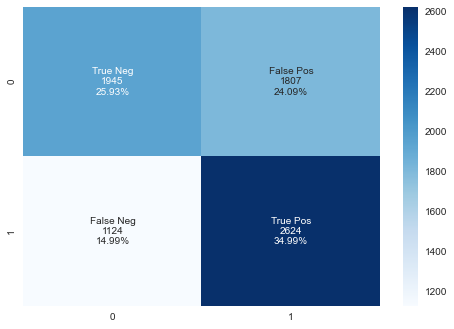

In [39]:
stack_matrix= metrics.confusion_matrix(y_true=y_test_pca_,y_pred=stack_pred)
group_names_stack = ['True Neg','False Pos','False Neg','True Pos']
group_counts_stack = ["{0:0.0f}".format(value) for value in stack_matrix.flatten()]
group_percent_stack = ["{0:.2%}".format(value) for value in stack_matrix.flatten()/np.sum(stack_matrix)]

labels = [[f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_stack,group_counts_stack,group_percent_stack)]]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(stack_matrix,annot=labels, fmt='', cmap='Blues')

###### VotingClassifier

In [40]:
estimators_ = [('lr', log_reg),('xgb',xgb_clf_),('st',stacking_clf)]

voting_clf = VotingClassifier(estimators=estimators_,voting='soft')
voting_clf. fit(x_train_pca_, y_train_pca_)
voting_pred = voting_clf.predict(x_test_pca_)

In [41]:
voting_score = metrics.accuracy_score(y_true=y_test_pca_,y_pred=voting_pred)
voting_recall = metrics.recall_score(y_true=y_test_pca_,y_pred=voting_pred)
voting_percision = metrics.precision_score(y_true=y_test_pca_,y_pred=voting_pred)
voting_f1 = metrics.f1_score(y_true=y_test_pca_,y_pred=voting_pred)
voting_scores = pd.DataFrame(index = ['voting'], data = {'score':voting_score,'recall':voting_recall,'percision':voting_percision,'f1':voting_f1})
voting_scores

,score,recall,percision,f1
voting,0.639067,0.638741,0.638911,0.638826


In [42]:
pd.concat([log_scores,xgb_scores,stack_scores,voting_scores])

,score,recall,percision,f1
log_reg,0.601333,0.581644,0.605219,0.593197
xgb,0.610800,0.623533,0.607802,0.615567
stacking,0.609200,0.700107,0.592191,0.641643
voting,0.639067,0.638741,0.638911,0.638826


In [43]:
train_images_filepath[13821]

'C:\\Users\\meirk\\Desktop\\train\\train/dog.11186.jpg'

(232, 263, 3)
(232, 263, 3)


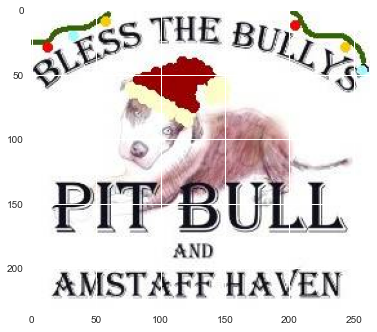

In [44]:
img = cv2.imread(train_images_filepath[13821])
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
print(img.shape)
plt.imshow(img)